### Data Preparation

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

##### Import Dataset

In [2]:
import pandas as pd
df = pd.read_csv ('YelpDataset.csv', index_col = 0)

##### Dataset Description 

In [3]:
print(df)

                 business_id  stars       city state  review_count  is_open  \
1     _-4KBW-tUcqeyg3MAMWKVg      3   Richmond    BC            67        1   
2     _-4KBW-tUcqeyg3MAMWKVg      3   Richmond    BC            67        1   
3     _-4KBW-tUcqeyg3MAMWKVg      3   Richmond    BC            67        1   
4     _-4KBW-tUcqeyg3MAMWKVg      3   Richmond    BC            67        1   
5     _3FBR7yCFDfeDeLsyWrPbQ      4  Vancouver    BC           211        1   
...                      ...    ...        ...   ...           ...      ...   
7417  ZZ7IXc-ZsyCPvdLPmHkPnw      4  Vancouver    BC            10        1   
7418  ZZ7IXc-ZsyCPvdLPmHkPnw      4  Vancouver    BC            10        1   
7419  ZZ7IXc-ZsyCPvdLPmHkPnw      4  Vancouver    BC            10        1   
7420  ZzEcWEsSrT-klyErof4DMw      4  Vancouver    BC            32        1   
7421  ZzEcWEsSrT-klyErof4DMw      4  Vancouver    BC            32        1   

                                           categori

In [4]:
df.head(5)

,business_id,stars,city,state,review_count,is_open,categories,review_id,date,text
1,_-4KBW-tUcqeyg3MAMWKVg,3,Richmond,BC,67,1,"Chinese, Breakfast & Brunch, Restaurants, Cafes",vvbTNGUBjuwPy3-EJRKn3Q,2018-01-19 16:02:36,ok service\nfood was ok nothing special\nover ...
2,_-4KBW-tUcqeyg3MAMWKVg,3,Richmond,BC,67,1,"Chinese, Breakfast & Brunch, Restaurants, Cafes",KIeZBzSyE01SdyDMvOamaQ,2018-03-25 07:37:32,Overpriced for what you get but great baked po...
3,_-4KBW-tUcqeyg3MAMWKVg,3,Richmond,BC,67,1,"Chinese, Breakfast & Brunch, Restaurants, Cafes",jQjJNKnGLqsnNXTiYsBVbQ,2018-05-17 21:16:35,I agree with everyone that the price is on the...
4,_-4KBW-tUcqeyg3MAMWKVg,3,Richmond,BC,67,1,"Chinese, Breakfast & Brunch, Restaurants, Cafes",5RR5VRgFkWEIIJ7V-CDucw,2018-01-07 07:58:12,Great little Hong Kong styled cafe. The food i...
5,_3FBR7yCFDfeDeLsyWrPbQ,4,Vancouver,BC,211,1,"Bars, Restaurants, Asian Fusion, Nightlife",r6cHt6WNakttlTsH-Xke2w,2018-09-23 15:48:42,This is a nice place in Chinatown Vancouver. I...


##### Dataset Types 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7421 entries, 1 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   7421 non-null   object
 1   stars         7421 non-null   int64 
 2   city          7421 non-null   object
 3   state         7421 non-null   object
 4   review_count  7421 non-null   int64 
 5   is_open       7421 non-null   int64 
 6   categories    7421 non-null   object
 7   review_id     7421 non-null   object
 8   date          7421 non-null   object
 9   text          7421 non-null   object
dtypes: int64(3), object(7)
memory usage: 637.7+ KB


##### Statistical Analysis of the Dataset 

In [6]:
df.describe()

,stars,review_count,is_open
count,7421.000000,7421.000000,7421.0
mean,3.852176,256.773885,1.0
std,0.492920,342.076862,0.0
min,1.000000,5.000000,1.0
25%,4.000000,66.000000,1.0
50%,4.000000,137.000000,1.0
75%,4.000000,303.000000,1.0
max,5.000000,2302.000000,1.0


##### Count Value of Stars Attribute 

In [7]:
df['stars'].value_counts()

4    5835
3    1186
5     302
2      81
1      17
Name: stars, dtype: int64

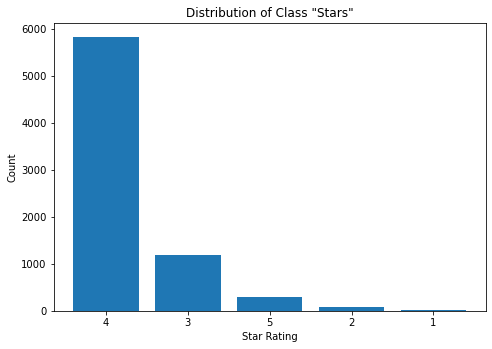

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = ["4", "3", "5", "2", "1"]
x = df['stars'].value_counts()
ax.bar(labels, x)
ax.set_ylabel('Count')
ax.set_xlabel('Star Rating')
ax.set_title('Distribution of Class "Stars"')
plt.savefig('output2.png', dpi = 250, bbox_inches = 'tight')
plt.show()

##### Identify Missing Values in Dataset

In [9]:
df.isna().sum()

business_id     0
stars           0
city            0
state           0
review_count    0
is_open         0
categories      0
review_id       0
date            0
text            0
dtype: int64

>###### No action needed, this dataset does not have missing values.

##### Extracting Month From Date Attribute 

In [10]:
month = []

for i in range(0, len(df)):
    month.append(int(df.iloc[i].date[5:7]))

df['month'] = month

df['month'].value_counts()

7     754
8     740
1     658
4     639
9     622
6     610
5     607
3     599
10    586
11    550
12    545
2     511
Name: month, dtype: int64

##### Data Type Transformation 

In [11]:
def convert(data):
    encode = LabelEncoder()
    data['business_id'] = encode.fit_transform(data.business_id)
    data['city'] = encode.fit_transform(data.city)
    data['state'] = encode.fit_transform(data.state)
    data['categories'] = encode.fit_transform(data.categories)
    data['review_id'] = encode.fit_transform(data.review_id)
    data['date'] = encode.fit_transform(data.date)
    data['text'] = encode.fit_transform(data.text)
    data=data.fillna(-999)
    return data

df = convert(df)
df = convert(df)

##### Dataset with Modified Values 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7421 entries, 1 to 7421
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   business_id   7421 non-null   int64
 1   stars         7421 non-null   int64
 2   city          7421 non-null   int64
 3   state         7421 non-null   int64
 4   review_count  7421 non-null   int64
 5   is_open       7421 non-null   int64
 6   categories    7421 non-null   int64
 7   review_id     7421 non-null   int64
 8   date          7421 non-null   int64
 9   text          7421 non-null   int64
 10  month         7421 non-null   int64
dtypes: int64(11)
memory usage: 695.7 KB


In [13]:
df.describe()

,business_id,stars,city,state,review_count,is_open,categories,review_id,date,text,month
count,7421.000000,7421.000000,7421.000000,7421.0,7421.000000,7421.0,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,730.908907,3.852176,12.640210,0.0,256.773885,1.0,573.972645,3710.000000,3709.625657,3706.189328,6.464627
std,422.489017,0.492920,4.503837,0.0,342.076862,0.0,329.773836,2142.402507,2141.996831,2139.824393,3.357334
min,0.000000,1.000000,0.000000,0.0,5.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,376.000000,4.000000,12.000000,0.0,66.000000,1.0,286.000000,1855.000000,1855.000000,1854.000000,4.000000
50%,714.000000,4.000000,15.000000,0.0,137.000000,1.0,551.000000,3710.000000,3710.000000,3706.000000,7.000000
75%,1095.000000,4.000000,15.000000,0.0,303.000000,1.0,871.000000,5565.000000,5564.000000,5558.000000,9.000000
max,1435.000000,5.000000,16.000000,0.0,2302.000000,1.0,1100.000000,7420.000000,7419.000000,7413.000000,12.000000


##### Correlation Analysis 

In [14]:
correlation = df.corr()
print(correlation)

              business_id     stars      city  state  review_count  is_open  \
business_id      1.000000  0.007146  0.057074    NaN      0.038179      NaN   
stars            0.007146  1.000000  0.123921    NaN      0.139180      NaN   
city             0.057074  0.123921  1.000000    NaN      0.243711      NaN   
state                 NaN       NaN       NaN    NaN           NaN      NaN   
review_count     0.038179  0.139180  0.243711    NaN      1.000000      NaN   
is_open               NaN       NaN       NaN    NaN           NaN      NaN   
categories       0.019585 -0.027075 -0.010481    NaN     -0.120060      NaN   
review_id        0.007440 -0.002251 -0.006815    NaN     -0.000257      NaN   
date             0.008044  0.011495  0.004474    NaN     -0.000294      NaN   
text             0.016763 -0.042705 -0.010314    NaN     -0.002612      NaN   
month            0.007292  0.012761  0.003133    NaN      0.001831      NaN   

              categories  review_id      date      

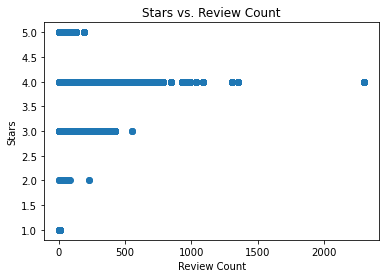

In [15]:
plt.scatter( x = 'review_count', y = 'stars', data = df)
plt.title("Stars vs. Review Count")
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.savefig('output3.png', dpi = 250, bbox_inches = 'tight')

>###### Correlation of attributes review count with stars

##### Coefficient of Correlation 

In [16]:
from scipy import stats 
stats.pearsonr(df['stars'], df['review_count'])

(0.13918006520614612, 2.0273007378850047e-33)

##### Correlation Matrix

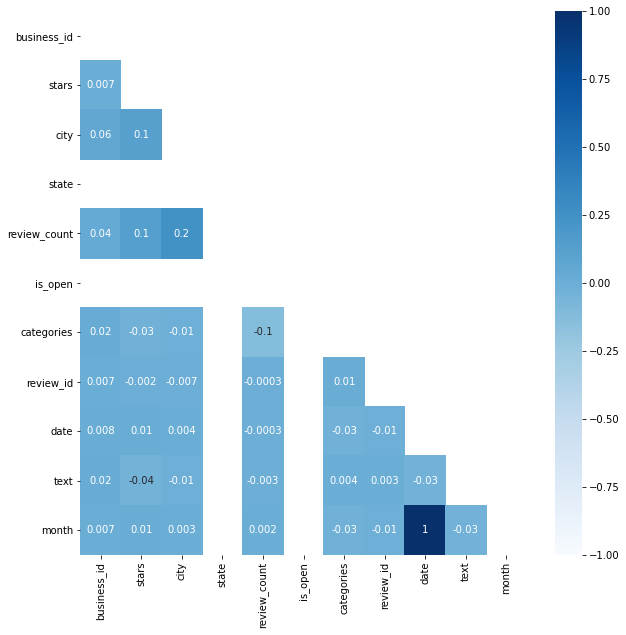

In [17]:
matrix = np.triu(correlation)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, ax = ax, fmt = '.1g', vmin = -1, vmax = 1, center = 0, mask = matrix, cmap = 'Blues')
plt.savefig('output4.png', dpi = 250, bbox_inches = 'tight')
plt.show()

In [18]:
cormat = df.corr()
round(cormat, 2)

,business_id,stars,city,state,review_count,is_open,categories,review_id,date,text,month
business_id,1.00,0.01,0.06,NaN,0.04,NaN,0.02,0.01,0.01,0.02,0.01
stars,0.01,1.00,0.12,NaN,0.14,NaN,-0.03,-0.00,0.01,-0.04,0.01
city,0.06,0.12,1.00,NaN,0.24,NaN,-0.01,-0.01,0.00,-0.01,0.00
state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_count,0.04,0.14,0.24,NaN,1.00,NaN,-0.12,-0.00,-0.00,-0.00,0.00
is_open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,0.02,-0.03,-0.01,NaN,-0.12,NaN,1.00,0.01,-0.03,0.00,-0.03
review_id,0.01,-0.00,-0.01,NaN,-0.00,NaN,0.01,1.00,-0.01,0.00,-0.01
date,0.01,0.01,0.00,NaN,-0.00,NaN,-0.03,-0.01,1.00,-0.03,1.00
text,0.02,-0.04,-0.01,NaN,-0.00,NaN,0.00,0.00,-0.03,1.00,-0.03


##### Correlation Matrix to Heat Map

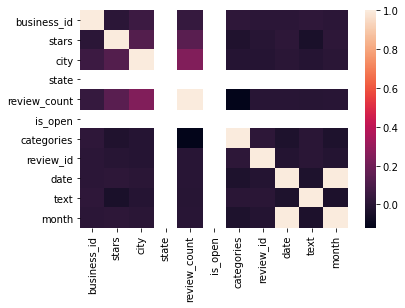

In [19]:
sns.heatmap(cormat)
plt.savefig('output5.png', dpi = 250, bbox_inches = 'tight')

###### From the above correlation analysis we can conclude the following:
>###### - There are no attributes that have a high liner correlation
>###### - The following attributes have a low linear correlation: 
>>######  - Stars and review count and stars and city have a correlation of 0.2
>>######  - City and review_count have a correlation of 0.3

##### Boxplot of Attributes

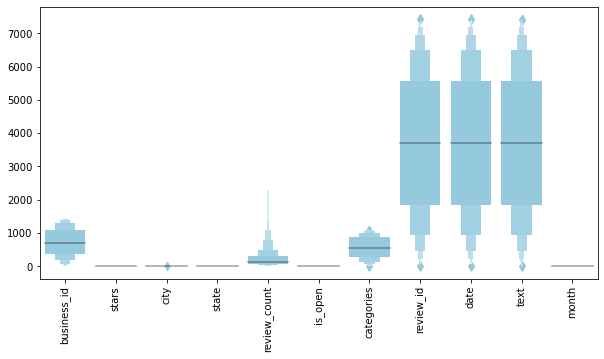

In [20]:
plt.figure(figsize = (10, 5))
sns.boxenplot(data = df,color = "skyblue")
plt.xticks(rotation = 90)
plt.savefig('output6.png', dpi = 250, bbox_inches = 'tight')
plt.show()

##### Histogram of Attributes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


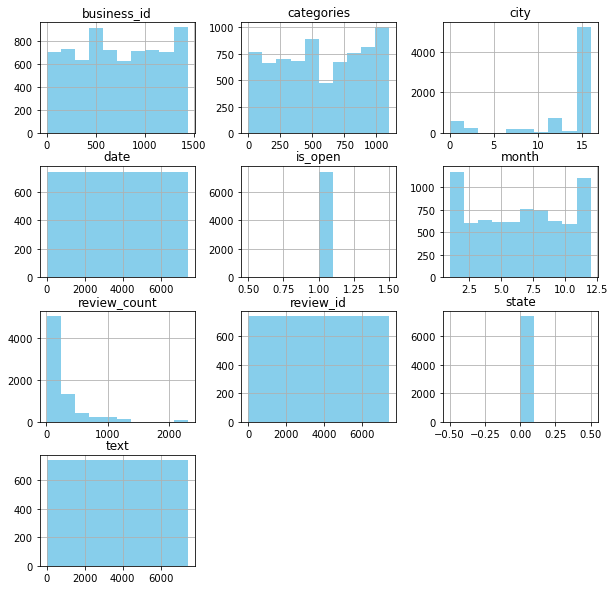

In [21]:
dfx = df.drop(columns = ['stars'])
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
dfx.hist(ax = ax, color = 'skyblue')
plt.savefig('output7.png', dpi = 250, bbox_inches = 'tight')
plt.show()

##### Distribution of Star Ratings for Each City

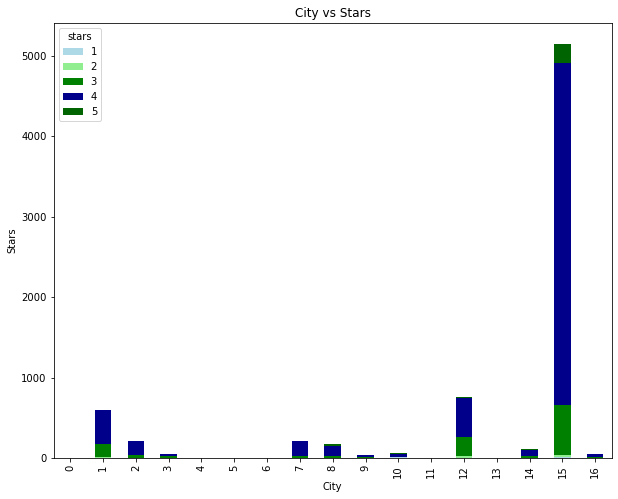

In [22]:
plot1 = pd.crosstab(df['city'], df['stars'])
plot1.plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['lightblue', 'lightgreen', 'green', 'darkblue', 'darkgreen'])
plt.title('City vs Stars')
plt.xlabel("City")
plt.ylabel("Stars")
plt.savefig('output8.png', dpi = 250, bbox_inches = 'tight')
plt.show()

##### Distribution for Review Count Attribute

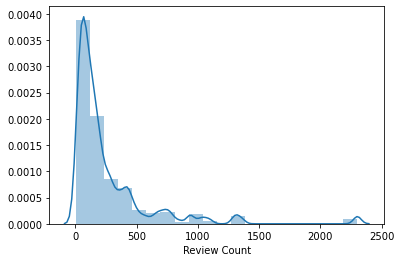

In [23]:
p = sns.distplot(df['review_count'], bins = 20)
p.set_xlabel("Review Count")
plt.savefig('output9.png', dpi = 250, bbox_inches = 'tight')

##### Checking the Distribution of Review Count by City

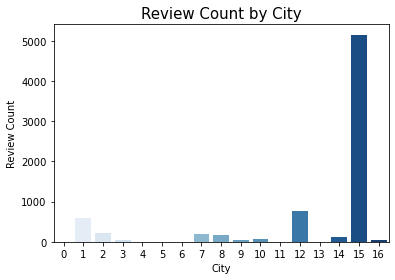

In [24]:
plt.subplot(1, 1, 1)
sns.countplot(df['city'], palette = 'Blues')
plt.title('Review Count by City', fontsize = 15)
plt.xlabel('City', fontsize = 10)
plt.ylabel('Review Count', fontsize = 10)
plt.savefig('output10.png', dpi = 250, bbox_inches = 'tight')

##### Checking the Distribution of Review Count by Month

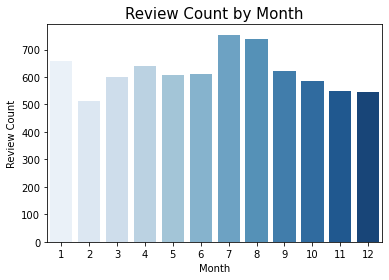

In [25]:
plt.subplot(1, 1, 1)
sns.countplot(df['month'], palette = 'Blues')
plt.title('Review Count by Month', fontsize = 15)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Review Count', fontsize = 10)
plt.savefig('output11.png', dpi = 250, bbox_inches = 'tight')